<a href="https://colab.research.google.com/github/Meta-user-byte/ISIT-Hack/blob/main/Optimizing_Quantum_Sensor_Network_via_QML_and_QUBO_Formulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISIT Quantum Hackathon'25 -- Team Qubit Questers
###Members -- Himanshu Sahu, Monika Varshney, Mansi Raghav, Ankit Sharma, Soham Pawar
Project Title - Optimizing Quantum Sensor Network via QML and QUBO  Formulations

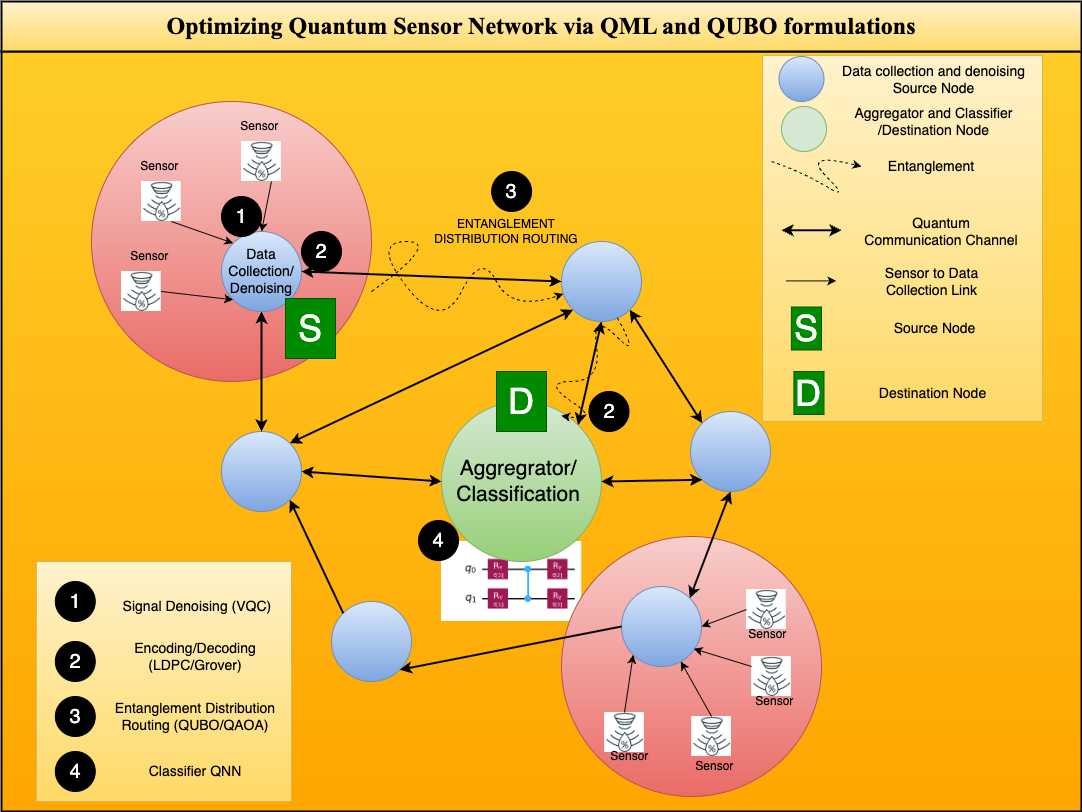

#Required Libraries
1. Qiskit
2. Pennylane
3. Qiskit_Aer
4. Qiskit_Algorithms
5. Qiskit_Optimization
6. Sklearn
7. Gurobi

In [ ]:
!pip install qiskit==0.39.0
!pip install --upgrade pip wheel
!pip install qiskit-aer==0.10.4


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 37.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
  

In [ ]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [pennylane]


In [ ]:
!pip install pennylane-qiskit

  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 69.5 MB/s eta 0:00:00
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [pennylane-qiskit]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

#Step1.1 Data Generation and Aggregation
###Binary Analog data -- Sine wave, Square Wave.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_aer.primitives import EstimatorV2
#from qiskit.algorithms.optimizers import COBYLA
from scipy.optimize import minimize
import pennylane as qml
from qiskit_aer.noise import NoiseModel, depolarizing_error

def generate_signals(n_samples=200, n_points=8):
    """
    Generates a synthetic dataset of sine vs. square waves.

    Args:
        n_samples (int): Total number of signal samples to generate.
        n_points (int): Number of time points to sample for each signal. This
                        will correspond to the number of features/qubits.

    Returns:
        tuple: A tuple containing the signal data (X) and labels (y).
    """
    X = []
    y = []
    t = np.linspace(0, 1, n_points)

    for _ in range(n_samples):
        # Randomly choose between class 0 (sine) and class 1 (square)
        if np.random.rand() < 0.5:
            # Class 0: Sine wave with random frequency and noise
            freq = np.random.uniform(1, 5)
            sig = np.sin(2 * np.pi * freq * t) + 0.1 * np.random.randn(n_points)
            label = 0
        else:
            # Class 1: Square wave with random frequency and noise
            freq = np.random.uniform(1, 5)
            sig = np.sign(np.sin(2 * np.pi * freq * t)) + 0.1 * np.random.randn(n_points)
            label = 1
        X.append(sig)
        y.append(label)

    X = np.array(X)
    y = np.array(y)
    return X, y

# --- 1. Data Generation and Preprocessing ---
print("Step 1: Generating and preprocessing data...")
# Use n_points=8, which means we will need 8 qubits.
X, y = generate_signals(n_samples=200, n_points=8)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print(f"Data prepared: {X_train.shape} training samples, {X_test.shape} test samples.")
print("-" * 30)

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


Step 1: Generating and preprocessing data...
Data prepared: (140, 8) training samples, (60, 8) test samples.
------------------------------


In [ ]:
y_train = 2 * (y_train == 1) - 1
y_test = 2 * (y_test == 1) - 1


In [ ]:
print("Unique test labels:", np.unique(y_test))  # Should show [-1, 1]

Unique test labels: [-1  1]


# 1.2 Denoising using VQC

In [ ]:
#  PennyLane VQC Construction ---
import pennylane as qml
from pennylane import numpy as pnp

n_qubits = X_train.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

# Define ZZFeatureMap (custom)
def zz_feature_map(x):
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
    for i in range(n_qubits):
        qml.RZ(x[i], wires=i)
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            qml.CNOT(wires=[i, j])
            qml.RZ(2 * x[i] * x[j], wires=j)
            qml.CNOT(wires=[i, j])

# Define the full circuit with ansatz
@qml.qnode(dev)
def circuit(x, weights):
    zz_feature_map(x)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))  # Binary output

def vqc_model(x, weights):
    return circuit(x, weights)

# Define loss function (logistic loss)
def loss(weights, X, y):
    preds = [vqc_model(x, weights) for x in X]
    return pnp.mean(pnp.log(1 + pnp.exp(-y * pnp.array(preds))))

# --- Part 3: Training with PennyLane Optimizer ---
print("Step 2: Constructing and training the VQC model...")

# Initialize trainable weights
depth = 7
weights = pnp.array(0.01 * np.random.randn(3, n_qubits, 3), requires_grad=True)

# Use PennyLane's Adam optimizer
opt = qml.optimize.AdamOptimizer(stepsize=0.1)
steps = 50

for step in range(steps):
    weights = opt.step(lambda w: loss(w, X_train, y_train), weights)
    if step % 10 == 0:
        current_loss = loss(weights, X_train, y_train)
        print(f"Step {step:3d} | Loss: {current_loss:.4f}")

print("Unique test labels:", np.unique(y_test))  # Should show [-1, 1]

# --- Part 4: Evaluation ---
print("\nStep 3: Evaluating on test data...")
# Predict 1 if output > 0, else -1
y_pred = [1 if vqc_model(x, weights) > 0 else -1 for x in X_test]
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Step 2: Constructing and training the VQC model...
Step   0 | Loss: 0.6907
Step  10 | Loss: 0.6667
Step  20 | Loss: 0.6451
Step  30 | Loss: 0.6371
Step  40 | Loss: 0.6346
Unique test labels: [-1  1]

Step 3: Evaluating on test data...
Test Accuracy: 81.67%


/tmp/ipython-input-9-1243402966.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129532 (\N{BAR OF SOAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


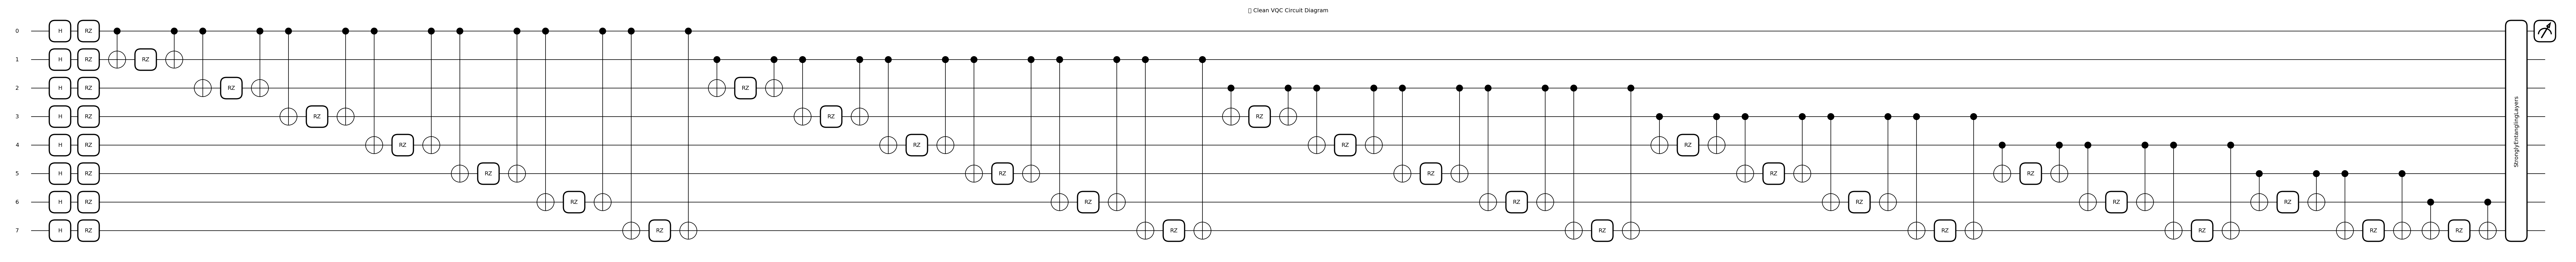

In [ ]:
import matplotlib.pyplot as plt

# Pick a sample input from the test set
sample_input = X_test[0]

# Draw the clean VQC circuit using the trained weights
fig, ax = qml.draw_mpl(circuit)(sample_input, weights)
fig.suptitle("🧼 Clean VQC Circuit Diagram", fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 4 dimensions
pca = PCA(n_components=4)
X_train_small = pca.fit_transform(X_train)
X_test_small = pca.transform(X_test)
n_qubits = 4  # now we're using only 4 qubits

 Training 4-qubit noisy VQC...
[00] Loss: 0.6909
[01] Loss: 0.6870
[02] Loss: 0.6829
[03] Loss: 0.6767
[04] Loss: 0.6701
[05] Loss: 0.6638
[06] Loss: 0.6593
[07] Loss: 0.6564
[08] Loss: 0.6542
[09] Loss: 0.6525
[10] Loss: 0.6513
[11] Loss: 0.6503
[12] Loss: 0.6503
[13] Loss: 0.6507
[14] Loss: 0.6508
[15] Loss: 0.6505
[16] Loss: 0.6499
[17] Loss: 0.6483
[18] Loss: 0.6459
[19] Loss: 0.6428
[20] Loss: 0.6395
[21] Loss: 0.6368
[22] Loss: 0.6353
[23] Loss: 0.6340
[24] Loss: 0.6316
[25] Loss: 0.6276
[26] Loss: 0.6229
[27] Loss: 0.6186
[28] Loss: 0.6156
[29] Loss: 0.6131

 Test Accuracy (4Q Noisy): 80.00%


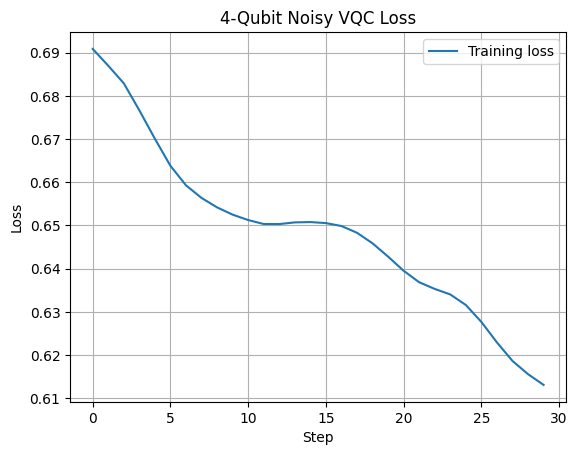

In [ ]:
import matplotlib.pyplot as plt

dev = qml.device("default.mixed", wires=n_qubits, shots=None)

def noisy_feature_map(x):
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)
        qml.DepolarizingChannel(0.01, wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])
        qml.DepolarizingChannel(0.02, wires=i+1)

@qml.qnode(dev)
def circuit(x, weights):
    noisy_feature_map(x)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

def model(x, w): return circuit(x, w)
def loss(w, X, y):
    return pnp.mean(pnp.log(1 + pnp.exp(-y * pnp.array([model(x, w) for x in X]))))

# Train with reduced qubits
weights = pnp.array(0.01 * np.random.randn(3, n_qubits, 3), requires_grad=True)
opt = qml.optimize.AdamOptimizer(stepsize=0.1)
losses = []

print(" Training 4-qubit noisy VQC...")
for step in range(30):
    weights = opt.step(lambda w: loss(w, X_train_small, y_train), weights)
    l = loss(weights, X_train_small, y_train)
    losses.append(l)
    print(f"[{step:02d}] Loss: {l:.4f}")

# Evaluate
y_pred = [1 if model(x, weights) > 0 else -1 for x in X_test_small]
acc = np.mean(y_pred == y_test)
print(f"\n Test Accuracy (4Q Noisy): {acc*100:.2f}%")

# Plot loss
plt.plot(losses, label="Training loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("4-Qubit Noisy VQC Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# --- Final Bitstream Outputs for Clean and Noisy VQCs ---

# Clean VQC Bitstream (already trained earlier with 8 qubits)
clean_bitstream = [1 if vqc_model(x, weights) > 0 else 0 for x in X_test]
print("\n Clean Bitstream:", clean_bitstream)

# Noisy VQC Bitstream (trained after PCA, with 4 qubits)
noisy_bitstream = [1 if model(x, weights) > 0 else 0 for x in X_test_small]
print(" Noisy Bitstream:", noisy_bitstream)

# Optional: Compare how many predictions differ
diff = sum(c != n for c, n in zip(clean_bitstream[:len(noisy_bitstream)], noisy_bitstream))
print(f"\n Bitstream differences: {diff}/{len(noisy_bitstream)}")

# Optional: Accuracy between clean and noisy prediction alignment
from sklearn.metrics import accuracy_score
bit_agreement_acc = accuracy_score(clean_bitstream[:len(noisy_bitstream)], noisy_bitstream)
print(f" Agreement Accuracy (clean vs noisy): {bit_agreement_acc * 100:.2f}%")



 Clean Bitstream: [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 Noisy Bitstream: [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]

 Bitstream differences: 22/60
 Agreement Accuracy (clean vs noisy): 63.33%


In [ ]:
# Clean bitstream from earlier
clean_bitstream = [
    1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
    0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]

# Binary Symmetric Channel: Flip bits with probability p
def add_bitflip_noise(bitstream, p=0.33):
    return [bit if np.random.rand() > p else 1 - bit for bit in bitstream]

# Apply noise
np.random.seed(42)  # Reproducibility
noisy_bitstream = add_bitflip_noise(clean_bitstream, p=0.33)

# Compare
differences = [int(c != n) for c, n in zip(clean_bitstream, noisy_bitstream)]
num_errors = sum(differences)
accuracy = 100 * (1 - num_errors / len(clean_bitstream))

noisy_bitstream, num_errors, accuracy


([1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1],
 26,
 56.666666666666664)

# STEP 2. Data Encoding and Decoding

In [ ]:
# Divide clean and noisy bitstreams into chunks of 6 bits (for Grover-based recovery)
chunk_size = 6

def chunk_bitstream(bitstream, size):
    return [bitstream[i:i+size] for i in range(0, len(bitstream), size)]

clean_chunks = chunk_bitstream(clean_bitstream, chunk_size)
noisy_chunks = chunk_bitstream(noisy_bitstream, chunk_size)

# Verify the result: show the first few chunks
chunk_data = {
    f"Chunk {i+1}": {
        "Clean": clean_chunks[i],
        "Noisy": noisy_chunks[i]
    }
    for i in range(len(clean_chunks))
}

chunk_data

In [ ]:
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.circuit import QuantumCircuit, Gate

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Check if a codeword passes parity checks ---
def passes_parity_checks(codeword_str, G):
    bits = np.array([int(b) for b in codeword_str])
    syndrome = (np.dot(G, bits.T) % 2).astype(int)
    return np.all(syndrome == 0)

# --- Compute Hamming distance between two binary strings ---
def hamming_distance(a, b):
    return sum(x != y for x, y in zip(a, b))

# --- Grover LDPC Decoder with improved post-selection ---
def grover_ldpc_decode(received_word, G, num_iterations=2, top_n=5, shots=4096, show_histogram=True):
    received_word = np.array(received_word)
    n_codeword = received_word.size
    n_ancilla = G.shape[0]
    total_qubits = n_codeword + n_ancilla + 1  # +1 for oracle qubit

    # Oracle construction
    oracle = QuantumCircuit(total_qubits, name="oracle")
    for i, row in enumerate(G):
        for j in range(n_codeword):
            if row[j] == 1:
                oracle.cx(j, n_codeword + i)
    oracle.x(range(n_codeword, n_codeword + n_ancilla))
    oracle.mcx(list(range(n_codeword, n_codeword + n_ancilla)), total_qubits - 1)
    oracle.x(range(n_codeword, n_codeword + n_ancilla))
    for i, row in enumerate(G):
        for j in range(n_codeword):
            if row[j] == 1:
                oracle.cx(j, n_codeword + i)
    oracle_gate = oracle.to_gate()

    # State preparation |r>
    prep_r = QuantumCircuit(n_codeword, name="A(r)")
    for i, bit in enumerate(received_word):
        if bit == 1:
            prep_r.x(i)
    prep_r_gate = prep_r.to_gate()
    prep_r_gate_inv = prep_r.inverse().to_gate(label="A(r)_inv")

    # Diffuser construction
    diffuser = QuantumCircuit(n_codeword, name="diffuser")
    diffuser.append(prep_r_gate_inv, range(n_codeword))
    diffuser.h(range(n_codeword))
    diffuser.x(range(n_codeword))
    diffuser.h(n_codeword - 1)
    diffuser.mcx(list(range(n_codeword - 1)), n_codeword - 1)
    diffuser.h(n_codeword - 1)
    diffuser.x(range(n_codeword))
    diffuser.h(range(n_codeword))
    diffuser.append(prep_r_gate, range(n_codeword))
    diffuser_gate = diffuser.to_gate()

    # Full circuit
    qr = QuantumRegister(total_qubits, 'q')
    cr = ClassicalRegister(n_codeword, 'c')
    qc = QuantumCircuit(qr, cr)

    qc.append(prep_r_gate, range(n_codeword))
    qc.x(total_qubits - 1)
    qc.h(total_qubits - 1)
    qc.barrier()

    for _ in range(num_iterations):
        qc.append(oracle_gate, range(total_qubits))
        qc.append(diffuser_gate, range(n_codeword))
        qc.barrier()

    qc.measure(range(n_codeword), cr)

    # Sampling
    sampler = Sampler()
    result = sampler.run(qc, shots=shots).result()
    probs = result.quasi_dists[0].binary_probabilities()
    counts = {bit[::-1]: int(p * shots) for bit, p in probs.items()}
    sorted_counts = sorted(counts.items(), key=lambda x: -x[1])

    # Display top candidates
    if top_n > 0:
        from pprint import pprint
        print("\nTop candidates:")
        pprint(sorted_counts[:top_n])

    # Select best valid codeword based on count and closeness
    valid_candidates = [
        (bitstring, count)
        for bitstring, count in sorted_counts
        if passes_parity_checks(bitstring, G)
    ]

    decoded_codeword = None
    confidence = 0
    if valid_candidates:
        received_str = ''.join(map(str, received_word))
        valid_candidates.sort(key=lambda x: (-x[1], hamming_distance(x[0], received_str)))
        decoded_codeword, count = valid_candidates[0]
        confidence = count / shots
    else:
        decoded_codeword = sorted_counts[0][0]
        confidence = sorted_counts[0][1] / shots
        print(" No valid codeword found; using most frequent result.")

    if show_histogram:
        plot_histogram(counts, title="Grover LDPC Decoding Histogram")
        plt.show()

    return decoded_codeword, confidence

In [ ]:
# LDPC Generator matrix
G = np.array([
    [1, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0]
])

# Message and encoded codeword
message = np.array([1, 0, 1])
codeword = np.dot(message, G) % 2
print("Original message:", message)
print("Encoded codeword:", codeword)

# Simulate noise
received = codeword.copy()
received[2] ^= 1  # flip bit 2

# Decode using Grover + LDPC
decoded_codeword, confidence = grover_ldpc_decode(received_word=received, G=G, num_iterations=2)

# Output results
print(f"\nDecoded Codeword: {decoded_codeword}")
print(f"Expected Codeword: {''.join(map(str, codeword))}")
print(f"Confidence: {confidence * 100:.2f}%")

if decoded_codeword == ''.join(map(str, codeword)):
    print(" Decoding successful!")
else:
    print(" Decoding failed.")


Original message: [1 0 1]
Encoded codeword: [1 0 1 0 1 1]

Top candidates:
[('100011', 3970),
 ('101011', 14),
 ('011010', 11),
 ('110110', 11),
 ('000111', 10)]

Decoded Codeword: 101011
Expected Codeword: 101011
Confidence: 0.34%
 Decoding successful!


/tmp/ipython-input-31-1202464292.py:19: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  decoded_codeword, confidence = grover_ldpc_decode(received_word=received, G=G, num_iterations=2)


In [ ]:
!pip install qiskit_optimization==0.6.1
!pip install qiskit-algorithms==0.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for docplex: filename=docplex-2.29.245-py3-none-any.whl size=685439 sha256=7eae777d37ad91c39ef4f3c16d45a18be8bca2b8d722bf0d3e1b490593ff80a0
  Stored in directory: /root/.cache/pip/wheels/be/37/0a/5f5f9ed14d637a664ad676493d55654f655a099c7016808739
Successfully built docplex
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [qiskit_optimization]


#STEP 3 Entanglement Routing and Decoding

In [ ]:
# --- Link modules in a main function ---
def integrate_and_route(message, G, edges):
    # LDPC-Grover decoding step
    codeword = ldpc_encode(message, G)
    noisy = add_noise(codeword)                    # simulate noise
    decoded_codeword, confidence = grover_ldpc_decode(noisy, G)
    decoded_bits = [int(b) for b in decoded_codeword]  # string to list of int bits        # Grover search decode
    print(f"Decoded bits: {decoded_bits}")

    # Parse decoded bits to routing parameters (example mapping)
    src = int("".join(str(b) for b in decoded_bits[:1]), 2)  # first bit = source (0 or 1)
    dst = int("".join(str(b) for b in decoded_bits[1:]), 2)  # next two bits = dest (0-3)
    print(f"Routing from node {src} to node {dst}")

    # Build the optimization problem for these nodes
    # (Using same structure as above, but you could adapt edges or constraints as needed)
    prog = QuadraticProgram()
    for var in edges:
        prog.binary_var(var)
    linear_objective = {var: -np.log(prob) for var, prob in edges.items()}
    prog.minimize(linear=linear_objective)
    # Adjust constraints based on parsed src/dst
    # (Here we reuse example constraints for src=0 or 1, dst=3)
    if src == 1:
        prog.linear_constraint({'x01':0, 'x13':1}, '==', 1, 'src1_out')
    else:
        prog.linear_constraint({'x01':1, 'x02':1}, '==', 1, 'src0_out')
    prog.linear_constraint({'x13':1, 'x23':1}, '==', 1, 'dst_in')
    prog.linear_constraint({'x01':1, 'x13':-1}, '==', 0, 'node1_flow')
    prog.linear_constraint({'x02':1, 'x23':-1}, '==', 0, 'node2_flow')

    # Solve via QAOA
    qaoa = QAOA(sampler=Sampler(), optimizer=COBYLA(), reps=8)
    optimizer = MinimumEigenOptimizer(qaoa)
    result = optimizer.solve(prog)
    path = [var for var,val in result.variables_dict.items() if val==1]
    print(f"Chosen path edges: {path}")

    # Compute end-to-end success probability as product of chosen edges
    success_prob = np.prod([edges[e] for e in path])
    print(f"End-to-end success probability ≈ {success_prob:.3f}")

# Run integration example
message = np.array([1,0,1])
integrate_and_route(message, G, edges)



Top candidates:
[('100011', 3959),
 ('101100', 16),
 ('000000', 14),
 ('011101', 11),
 ('110110', 9)]


/tmp/ipython-input-20-3214081649.py:6: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  decoded_codeword, confidence = grover_ldpc_decode(noisy, G)


Decoded bits: [1, 0, 1, 1, 0, 0]
Routing from node 1 to node 12


/tmp/ipython-input-20-3214081649.py:45: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  integrate_and_route(message, G, edges)


Chosen path edges: ['x01', 'x13']
End-to-end success probability ≈ 0.765


In [ ]:
import networkx as nx

In [ ]:
def ldpc_encode(message_bits, G):
    """Encode the binary message using generator matrix G (mod 2)."""
    return np.dot(message_bits, G) % 2

def add_noise(codeword, flip_index=2):
    """Simulate a bit-flip error at a specified index."""
    noisy = codeword.copy()
    if 0 <= flip_index < len(codeword):
        noisy[flip_index] ^= 1  # flip the bit
    return noisy

def grover_ldpc_decode(noisy_codeword, G):
    """
    Placeholder for a Grover-based LDPC decoder.
    In a real quantum decoder, Grover's algorithm would be used to find
    the valid codeword. Here we simply return the (string of) noisy codeword
    with full confidence for demonstration.
    """
    code_str = "".join(map(str, noisy_codeword))
    print(f"Decoding with Grover-LDPC (placeholder) on {noisy_codeword}")
    confidence = 1.0  # dummy confidence
    return code_str, confidence

# Define an LDPC generator matrix G and a message
G = np.array([
    [1,0,0,1,0,1],
    [0,1,0,1,1,1],
    [0,0,1,1,1,0]
])
message = np.array([1, 0, 1])  # example 3-bit message
print("Original message:", message)

# Encode the message
codeword = ldpc_encode(message, G)
print("Encoded codeword:", codeword)

# Add noise by flipping one bit (for example at index 2)
noisy = add_noise(codeword, flip_index=2)
print("Noisy codeword:  ", noisy)

# Decode (using placeholder Grover decoder)
decoded_str, confidence = grover_ldpc_decode(noisy, G)
decoded_bits = [int(b) for b in decoded_str]
print("Decoded bits:", decoded_bits, f"(confidence={confidence*100:.1f}%)")

Original message: [1 0 1]
Encoded codeword: [1 0 1 0 1 1]
Noisy codeword:   [1 0 0 0 1 1]
Decoding with Grover-LDPC (placeholder) on [1 0 0 0 1 1]
Decoded bits: [1, 0, 0, 0, 1, 1] (confidence=100.0%)


In [ ]:
# Parse decoded bits into source and destination
src = decoded_bits[0]
dst = (decoded_bits[1] << 1) + decoded_bits[4]  # binary to int
if src == dst:
    # avoid trivial loop: shift destination if same as source
    dst = (dst + 1) % 4
print(f"Routing from node {src} to node {dst}")


Routing from node 1 to node 2


In [ ]:
import networkx as nx

# Define example edge probabilities
edges = {
    'x01': 0.9,  # edge 0 -> 1
    'x02': 0.8,  # edge 0 -> 2
    'x13': 0.85, # edge 1 -> 3
    'x23': 0.95  # edge 2 -> 3
}
# Build directed graph
G_graph = nx.DiGraph()
for key, prob in edges.items():
    if len(key) == 3 and key.startswith('x'):
        try:
            i = int(key[1])
            j = int(key[2])
        except ValueError:
            print(f"Warning: could not parse edge key '{key}'. Skipping.")
            continue
        G_graph.add_edge(i, j)
print("Graph edges:", list(G_graph.edges()))


Graph edges: [(0, 1), (0, 2), (1, 3), (2, 3)]


In [ ]:


# Define Quadratic Program
qp = QuadraticProgram()
for var in edges:
    qp.binary_var(var)
# Set objective: minimize -sum(log(p)*x)
linear = {var: -np.log(prob) for var, prob in edges.items()}
qp.minimize(linear=linear)

# Flow constraints:
# 1) One outgoing edge from source
src_edges = {f'x{src}{j}': 1 for (_, j) in G_graph.out_edges(src)}
if src_edges:
    qp.linear_constraint(src_edges, '==', 1, name='src_out')
# 2) One incoming edge to destination
dst_edges = {f'x{i}{dst}': 1 for (i, _) in G_graph.in_edges(dst)}
if dst_edges:
    qp.linear_constraint(dst_edges, '==', 1, name='dst_in')
# 3) Flow conservation for intermediate nodes
for node in G_graph.nodes():
    if node in (src, dst):
        continue
    incoming = {f'x{i}{node}': 1 for (i, _) in G_graph.in_edges(node)}
    outgoing = {f'x{node}{j}': -1 for (_, j) in G_graph.out_edges(node)}
    if incoming or outgoing:
        flow_constr = {**incoming, **outgoing}
        qp.linear_constraint(flow_constr, '==', 0, name=f'flow_{node}')
print(qp.prettyprint())

Problem name: 

Minimize
  0.10536051565782628*x01 + 0.2231435513142097*x02 + 0.16251892949777494*x13
  + 0.05129329438755058*x23

Subject to
  Linear constraints (4)
    x13 == 1  'src_out'
    x02 == 1  'dst_in'
    -x01 - x02 == 0  'flow_0'
    x13 + x23 == 0  'flow_3'

  Binary variables (4)
    x01 x02 x13 x23



# QUBO formulation for the Entanglement Routing Distribution

/tmp/ipython-input-61-1588166539.py:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler(options={"seed": 42})


Chosen edges in path: ['x02', 'x24', 'x45']
Success probability: 0.727


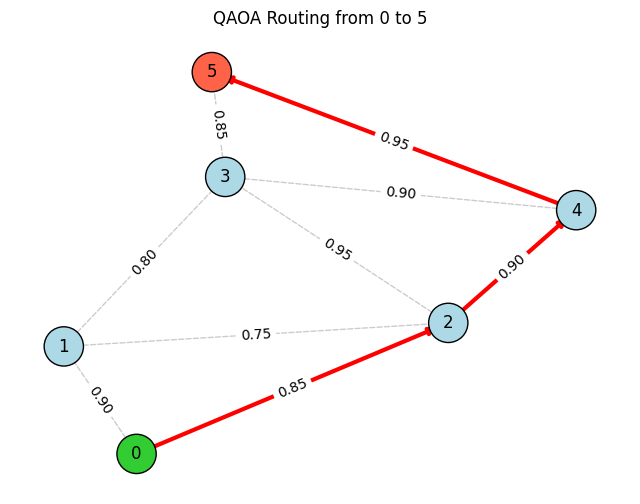

In [ ]:
# Seed for reproducibility
np.random.seed(42)
random.seed(42)
sampler = Sampler(options={"seed": 42})

# -------------------------
# 1. Define Graph & Edges
# -------------------------
edges = {
    'x01': 0.9, 'x02': 0.85,
    'x13': 0.8, 'x12': 0.75,
    'x23': 0.95, 'x24': 0.9,
    'x34': 0.9, 'x35': 0.85,
    'x45': 0.95
}

G_graph = nx.DiGraph()
for key in edges:
    if key.startswith('x') and len(key) == 3:
        try:
            i, j = int(key[1]), int(key[2])
            G_graph.add_edge(i, j)
        except ValueError:
            print(f"Skipping invalid edge name: {key}")

# -------------------------
# 2. Choose Source & Target
# -------------------------
src = 0
dst = 5

if not nx.has_path(G_graph, src, dst):
    raise ValueError(f"No path from {src} to {dst} in the graph.")

# -------------------------
# 3. Build Optimization Problem
# -------------------------
qp = QuadraticProgram()
for var in edges:
    qp.binary_var(var)

# Objective: maximize product of probabilities (minimize -log(p))
linear_obj = {var: -np.log(p) for var, p in edges.items()}
qp.minimize(linear=linear_obj)

# Constraint: one edge out of source
src_edges = {f'x{src}{j}': 1 for (_, j) in G_graph.out_edges(src)}
if src_edges:
    qp.linear_constraint(src_edges, '==', 1, 'src_out')

# Constraint: one edge into destination
dst_edges = {f'x{i}{dst}': 1 for (i, _) in G_graph.in_edges(dst)}
if dst_edges:
    qp.linear_constraint(dst_edges, '==', 1, 'dst_in')

# Flow conservation for intermediate nodes
for node in G_graph.nodes():
    if node in [src, dst]:
        continue
    incoming = {f'x{i}{node}': 1 for (i, _) in G_graph.in_edges(node)}
    outgoing = {f'x{node}{j}': -1 for (_, j) in G_graph.out_edges(node)}
    flow_constr = {**incoming, **outgoing}
    if flow_constr:
        qp.linear_constraint(flow_constr, '==', 0, f'flow_{node}')

# -------------------------
# 4. Solve with QAOA
# -------------------------
qaoa = QAOA(sampler=sampler, optimizer=COBYLA(), reps=3)
optimizer = MinimumEigenOptimizer(qaoa)
result = optimizer.solve(qp)

chosen_edges = [var for var, val in result.variables_dict.items() if np.isclose(val, 1.0)]
print("Chosen edges in path:", chosen_edges)

if chosen_edges:
    prob = np.prod([edges[e] for e in chosen_edges])
    print(f"Success probability: {prob:.3f}")
else:
    print("⚠️ No path found by QAOA.")

# -------------------------
# 5. Visualize Result
# -------------------------
def visualize_path(G, path_edges, edge_probs, src, dst):
    pos = nx.spring_layout(G, seed=1)
    sol_edges = []
    for var in path_edges:
        if len(var) == 3 and var.startswith('x'):
            i, j = int(var[1]), int(var[2])
            sol_edges.append((i, j))

    node_colors = ['limegreen' if n == src else 'tomato' if n == dst else 'lightblue' for n in G.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, edgecolors='black')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color='gray', style='dashed', alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=sol_edges, edge_color='red', width=3)

    edge_labels = {(int(k[1]), int(k[2])): f"{v:.2f}" for k, v in edge_probs.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

    plt.title(f"QAOA Routing from {src} to {dst}")
    plt.axis('off')
    plt.show()

visualize_path(G_graph, chosen_edges, edges, src, dst)